In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import upfirdn
import common
import random

In [2]:
beta = 0.25
# Number of symbol
span = 6.0
# Number of sample per symobl
sps  = 4.0
# Calculate SRRC filter
h = common.rcosdesign(beta, span, sps, 'normal')

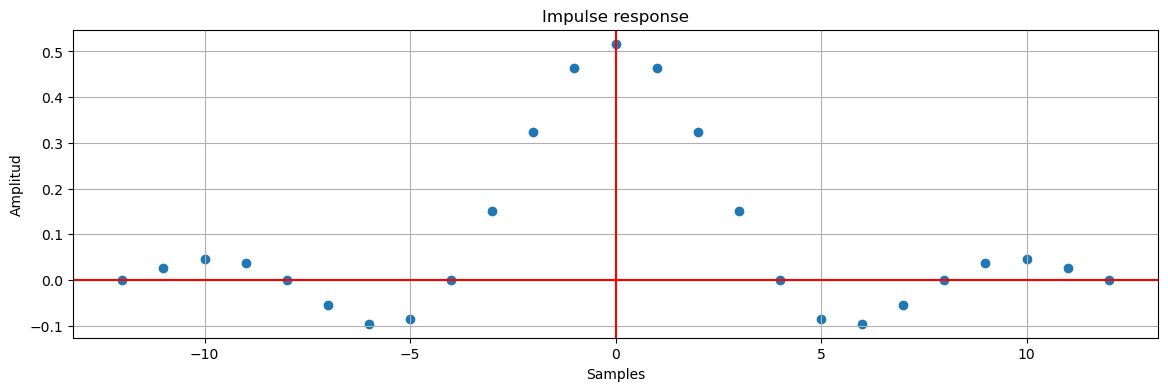

In [3]:
# Plot the SRRCfilter coeficients
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Impulse response')
x_midrange = (span * sps) / 2 
x_range = (span * sps) + 1.0
x = np.linspace(-x_midrange, x_midrange, int(x_range))
plt.scatter(x,h)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.axvline(0,color='red') # x = 0
plt.show()

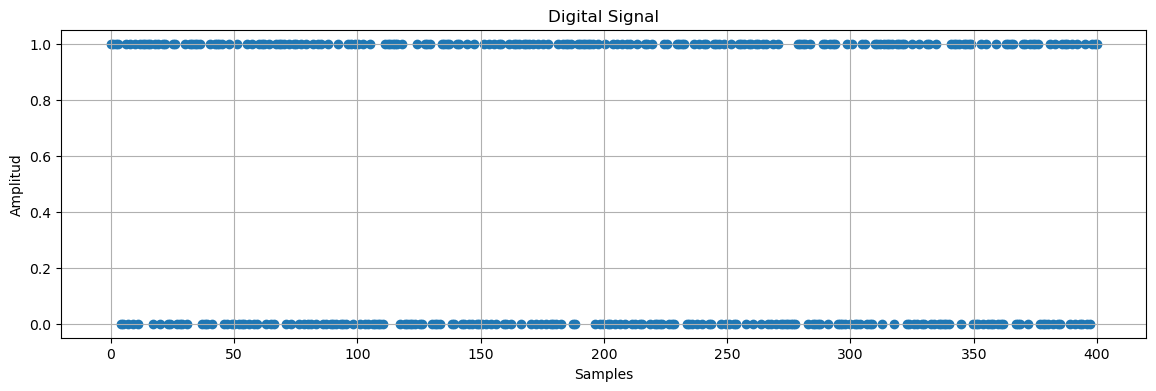

In [4]:
# Binary sequence generaion
num_d = 400
data_bin_tx = np.random.randint(2, size=num_d).tolist()

# Plot binary secuence
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Digital Signal')
x = np.linspace(0, num_d, num_d)
plt.scatter(x, data_bin_tx)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.show()

In [5]:
# QPSK codification
d_tx = common.code_qpsk(data_bin_tx)
d_tx_real = list(map(lambda i:d_tx[i].real , range(0, len(d_tx))))
d_tx_imag = list(map(lambda i:d_tx[i].imag , range(0, len(d_tx))))
print(len(d_tx_real))
print(len(d_tx_imag))

200
200


821
821


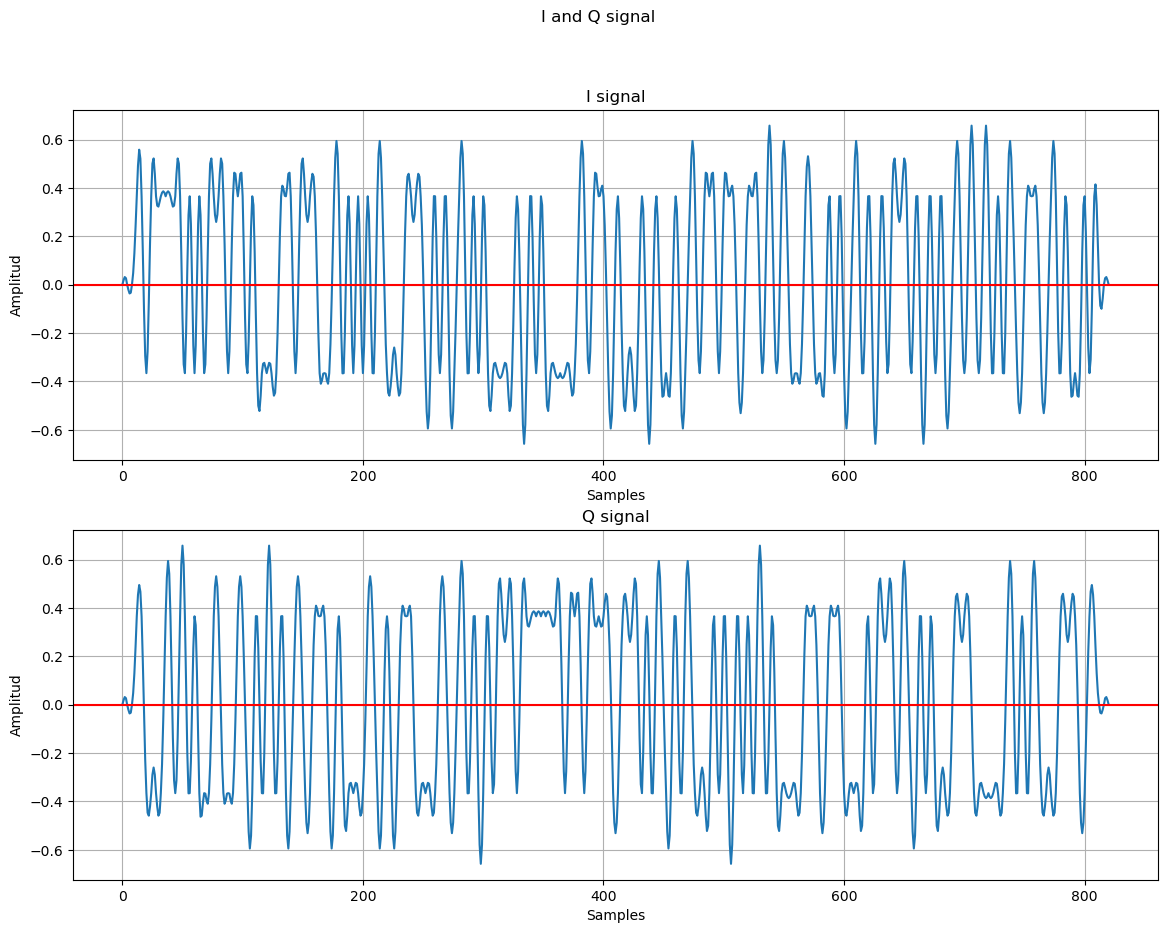

In [6]:
# UP converter with SRRC filter
signal_real =  upfirdn(h, d_tx_real, up=sps)
signal_imag  =  upfirdn(h, d_tx_imag, up=sps)

#Plot the signal after UP-CONVERTE
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figwidth(14)
fig.set_figheight(10)
fig.suptitle('I and Q signal')

ax1.set_title('I signal')
ax1.plot(signal_real)
ax1.grid()
ax1.set_xlabel("Samples")
ax1.set_ylabel("Amplitud")
ax1.axhline(0,color='red') # x = 0

ax2.set_title('Q signal')
ax2.plot(signal_imag)
ax2.grid()
ax2.set_xlabel("Samples")
ax2.set_ylabel("Amplitud")
ax2.axhline(0,color='red') # x = 0

print(len(signal_real))
print(len(signal_imag))

In [7]:
# Add noise to the signal
target_snr_db = 10

# Generate noise for I
signal_avg_watts_real = np.mean(signal_real)
signal_avg_db_real = 10 * np.log10(abs(signal_avg_watts_real))
noise_avg_db_real = signal_avg_db_real - target_snr_db
noise_avg_watts_real = 10 ** (noise_avg_db_real / 10)
mean_noise_real = 0
noise_volts_real = np.random.normal(mean_noise_real, np.sqrt(noise_avg_watts_real), len(signal_real))

# I Signal + Noise
signal_noise_real = signal_real + noise_volts_real

# Generate noise for Q
signal_avg_watts_imag = np.mean(signal_imag)
signal_avg_db_imag = 10 * np.log10(abs(signal_avg_watts_imag))
noise_avg_db_imag = signal_avg_db_imag - target_snr_db
noise_avg_watts_imag = 10 ** (noise_avg_db_imag / 10)
mean_noise_imag = 0
noise_volts_imag = np.random.normal(mean_noise_imag, np.sqrt(noise_avg_watts_imag), len(signal_imag))

# I Signal + Noise
signal_noise_imag = signal_imag + noise_volts_imag

print(len(signal_noise_real))
print(len(signal_noise_imag))

821
821


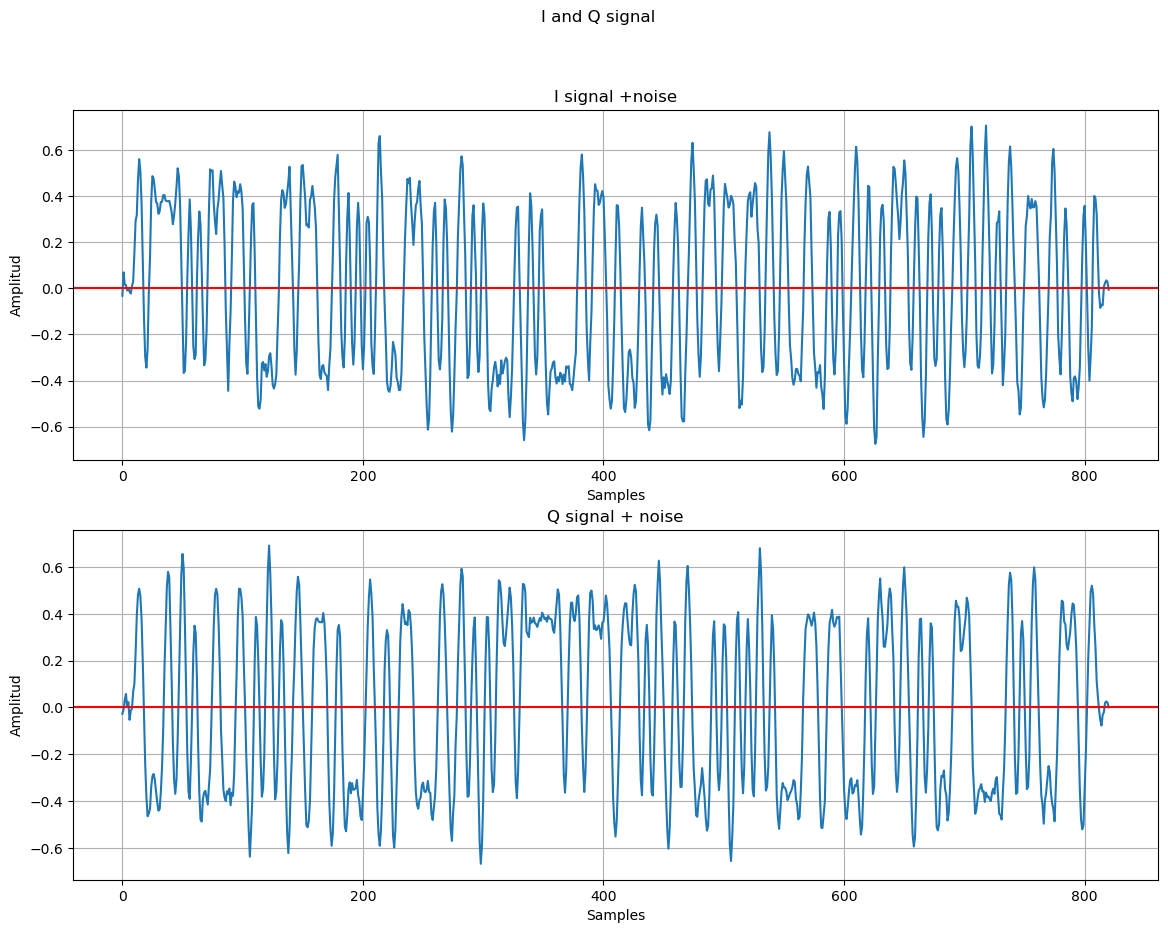

In [8]:
#Plot Signal + Noise
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figwidth(14)
fig.set_figheight(10)
fig.suptitle('I and Q signal')

ax1.set_title('I signal +noise')
ax1.plot(signal_noise_real)
ax1.grid()
ax1.set_xlabel("Samples")
ax1.set_ylabel("Amplitud")
ax1.axhline(0,color='red') # x = 0

ax2.set_title('Q signal + noise')
ax2.plot(signal_noise_imag)
ax2.grid()
ax2.set_xlabel("Samples")
ax2.set_ylabel("Amplitud")
ax2.axhline(0,color='red') # x = 0

In [9]:
# DOWN convert with SRRC filter
p1 = int(sps+2)
p2 = int(sps+2+(num_d/2))

d_rx_real = upfirdn(h, signal_noise_real, down=sps)[p1:p2]
d_rx_imag = upfirdn(h, signal_noise_imag, down=sps)[p1:p2]

print(len(d_rx_real))
print(len(d_rx_imag))

200
200


(-1.0, 1.0)

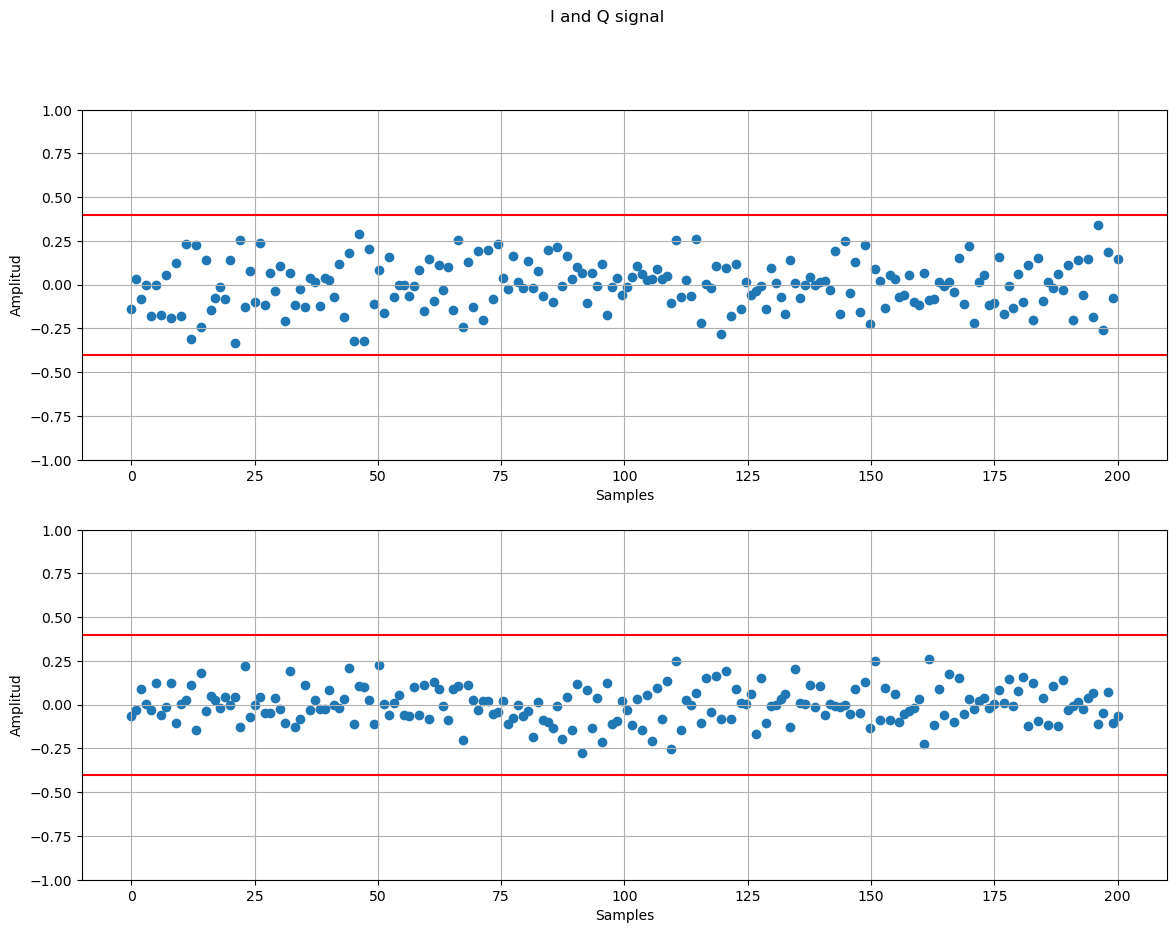

In [10]:
# Plot the QPSK send and the QPSK received
num_dx= len(d_rx_real)
x = np.linspace(0, num_dx, num_dx)


fig, (ax1, ax2) = plt.subplots(2)
fig.set_figwidth(14)
fig.set_figheight(10)
fig.suptitle('I and Q signal')

ax1.scatter(x, (d_tx_real-d_rx_real))
#ax1.scatter(x, d_tx_real)
ax1.grid()
ax1.set_xlabel("Samples")
ax1.set_ylabel("Amplitud")
ax1.axhline(0.4,color='red') # x = 0
ax1.axhline(-0.4,color='red') # x = 0
ax1.set_ylim(-1, 1)

#ax2.scatter(x, d_rx_imag)
ax2.scatter(x, (d_tx_imag-d_rx_imag))
ax2.grid()
ax2.set_xlabel("Samples")
ax2.set_ylabel("Amplitud")
ax2.axhline(0.4,color='red') # x = 0
ax2.axhline(-0.4,color='red') # x = 0
ax2.set_ylim(-1, 1)

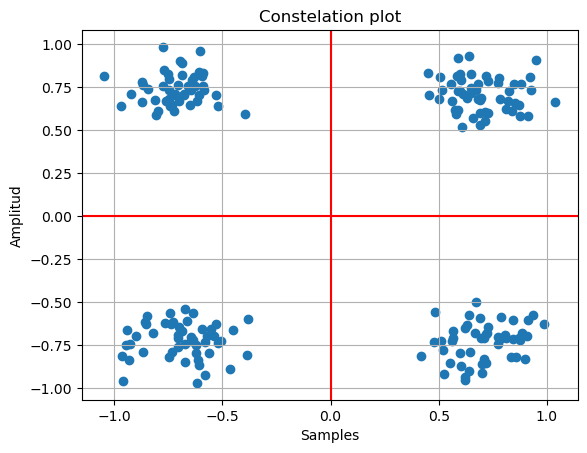

In [11]:
# Plot QPSK constelation
d_rx_const = d_rx_real + (1j * d_rx_imag) 
fig = plt.figure()
plt.title('Constelation plot')
plt.scatter(np.real(d_rx_const),np.imag(d_rx_const))
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.axvline(0,color='red') # y = 0
plt.show()